In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
with np.load('models/lminervatriamese_beta1457480019_beta_v1r0.npz') as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]

In [3]:
type(param_values)

list

In [4]:
len(param_values)

22

In [5]:
print np.shape(param_values[0])
print np.shape(param_values[0][0])
print np.shape(param_values[0][0][0])
print param_values[0][0][0]

(32, 1, 3, 3)
(1, 3, 3)
(3, 3)
[[ 0.02478351 -0.03574507 -0.01864632]
 [-1.01644897 -0.00968992  0.75672793]
 [ 0.04579682 -0.16656338  0.04352599]]


In [6]:
layer_names = {0:'conv-x', 1:'bias-x', 2:'conv-x', 3:'bias-x', 4:'dense-x', 5:'bias-x',
               6:'conv-u', 7:'bias-u', 8:'conv-u', 9:'bias-u', 10:'dense-u', 11:'bias-u',
               12:'conv-v', 13:'bias-v', 14:'conv-v', 15:'bias-v', 16:'dense-v', 17:'bias-v',
               18:'across-dense1', 19:'accros-bias1', 20:'across-dense2', 21: 'accros-bais2'
              }

In [7]:
for i, p in enumerate(param_values):
    print "{:02d}, {:15s}, {}".format(i, layer_names[i], np.shape(p))

00, conv-x         , (32, 1, 3, 3)
01, bias-x         , (32,)
02, conv-x         , (32, 32, 3, 3)
03, bias-x         , (32,)
04, dense-x        , (3872, 256)
05, bias-x         , (256,)
06, conv-u         , (32, 1, 3, 3)
07, bias-u         , (32,)
08, conv-u         , (32, 32, 3, 3)
09, bias-u         , (32,)
10, dense-u        , (3872, 256)
11, bias-u         , (256,)
12, conv-v         , (32, 1, 3, 3)
13, bias-v         , (32,)
14, conv-v         , (32, 32, 3, 3)
15, bias-v         , (32,)
16, dense-v        , (3872, 256)
17, bias-v         , (256,)
18, across-dense1  , (768, 128)
19, accros-bias1   , (128,)
20, across-dense2  , (128, 11)
21, accros-bais2   , (11,)


In [8]:
11 * 11 * 32

3872

3872 is the size of the image after two series of 3x3 convolution and 2x2 maxpooling (starting with 50x50) times a depth of 32 (the number of filters in the second convolutional layer). 

In [9]:
3 * (32 * 1 * 3 * 3 + 32 + 32 * 32 * 3 * 3 + 32 + 3872 * 256 + 256) + 768 * 128 + 128 + 128 * 11 + 11

3103019

In [10]:
print np.shape(param_values[2])
print np.shape(param_values[2][0])
print np.shape(param_values[2][0][0])
print param_values[2][0][0]

print np.shape(param_values[2][1][0])
print param_values[2][1][0]

print np.shape(param_values[2][0][1])
print param_values[2][0][1]

(32, 32, 3, 3)
(32, 3, 3)
(3, 3)
[[ -1.09221967e-39   1.10105345e-39   1.10500091e-39]
 [  1.14998960e-39  -1.10665304e-39  -1.10551098e-39]
 [  1.16882445e-39  -1.21219464e-39   1.15952403e-39]]
(3, 3)
[[ 0.01495949  0.16833337  0.07591698]
 [-0.10300549 -0.05241377  0.19035225]
 [-0.06575292 -0.01979629  0.09239817]]
(3, 3)
[[  1.13959056e-39   1.18423173e-39   1.15705635e-39]
 [ -2.65990859e-38  -1.26745204e-39  -1.20840973e-39]
 [ -4.26549154e-36   6.56416249e-35  -9.54520879e-31]]


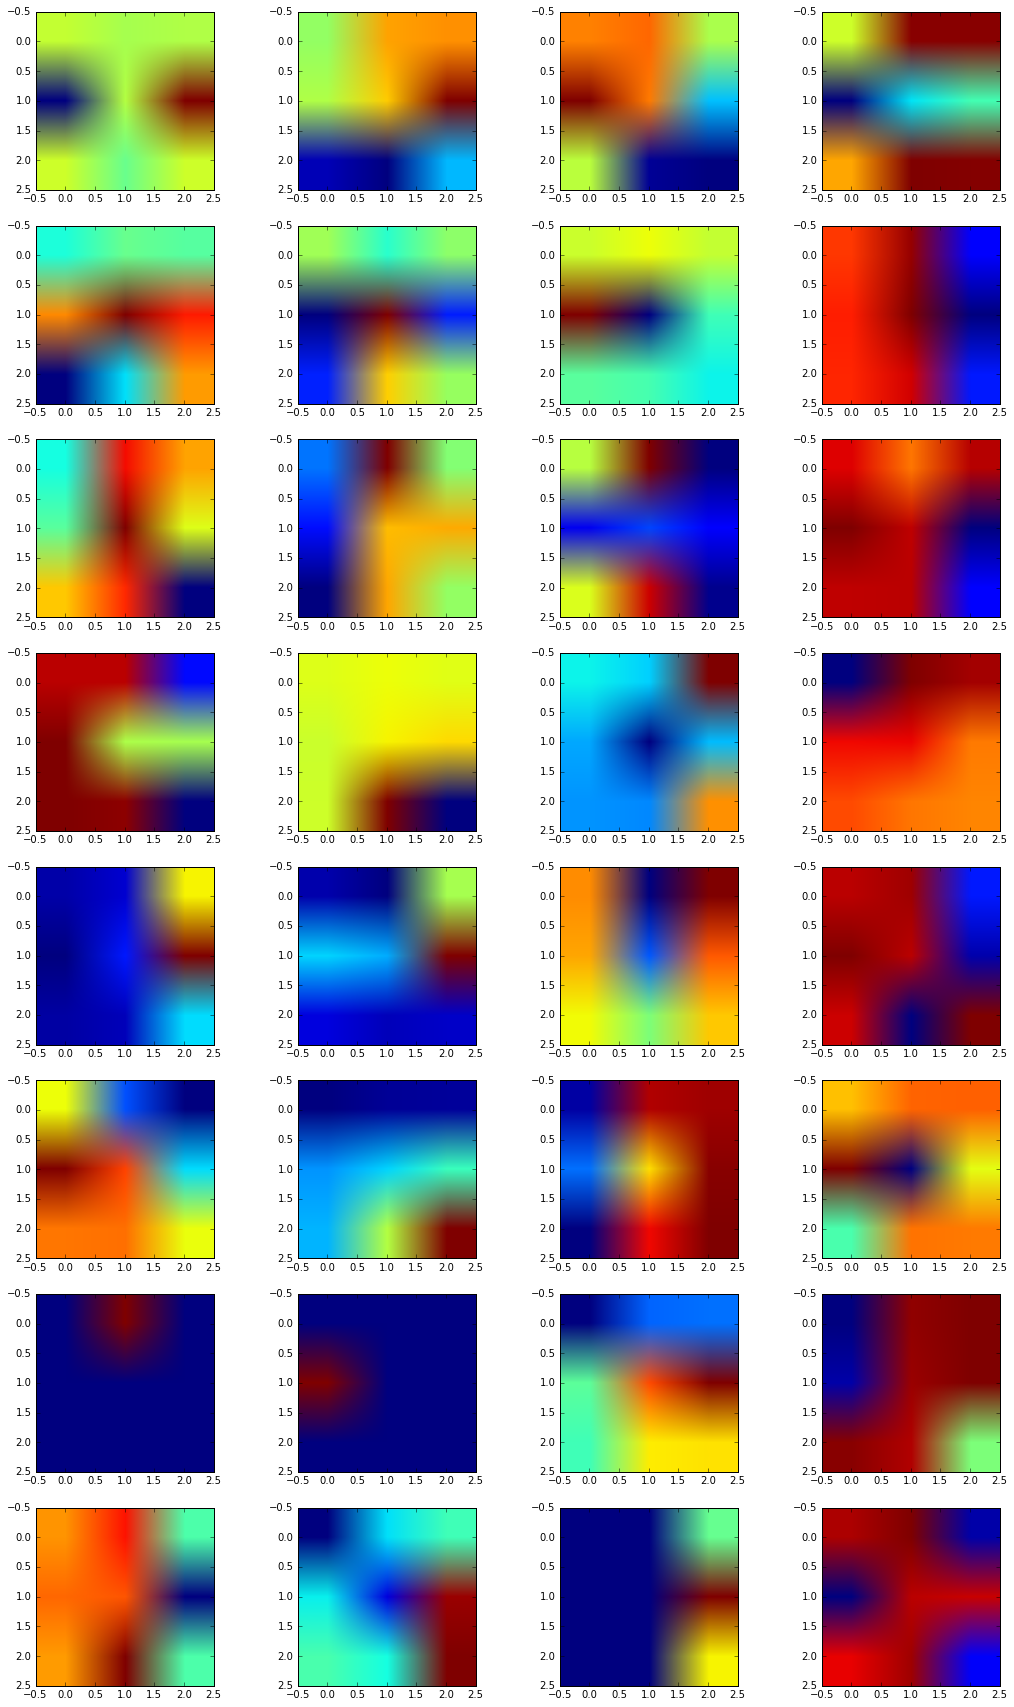

In [11]:
# look at first x convolution weights
fig = plt.figure(figsize=(18, 30))
gs = plt.GridSpec(8, 4)
for i in range(0, 32):
    ax = plt.subplot(gs[i])
    ax.imshow(param_values[0][i][0], interpolation=None)
    
figname = 'first-x-conv-weights.pdf'
plt.savefig(figname)

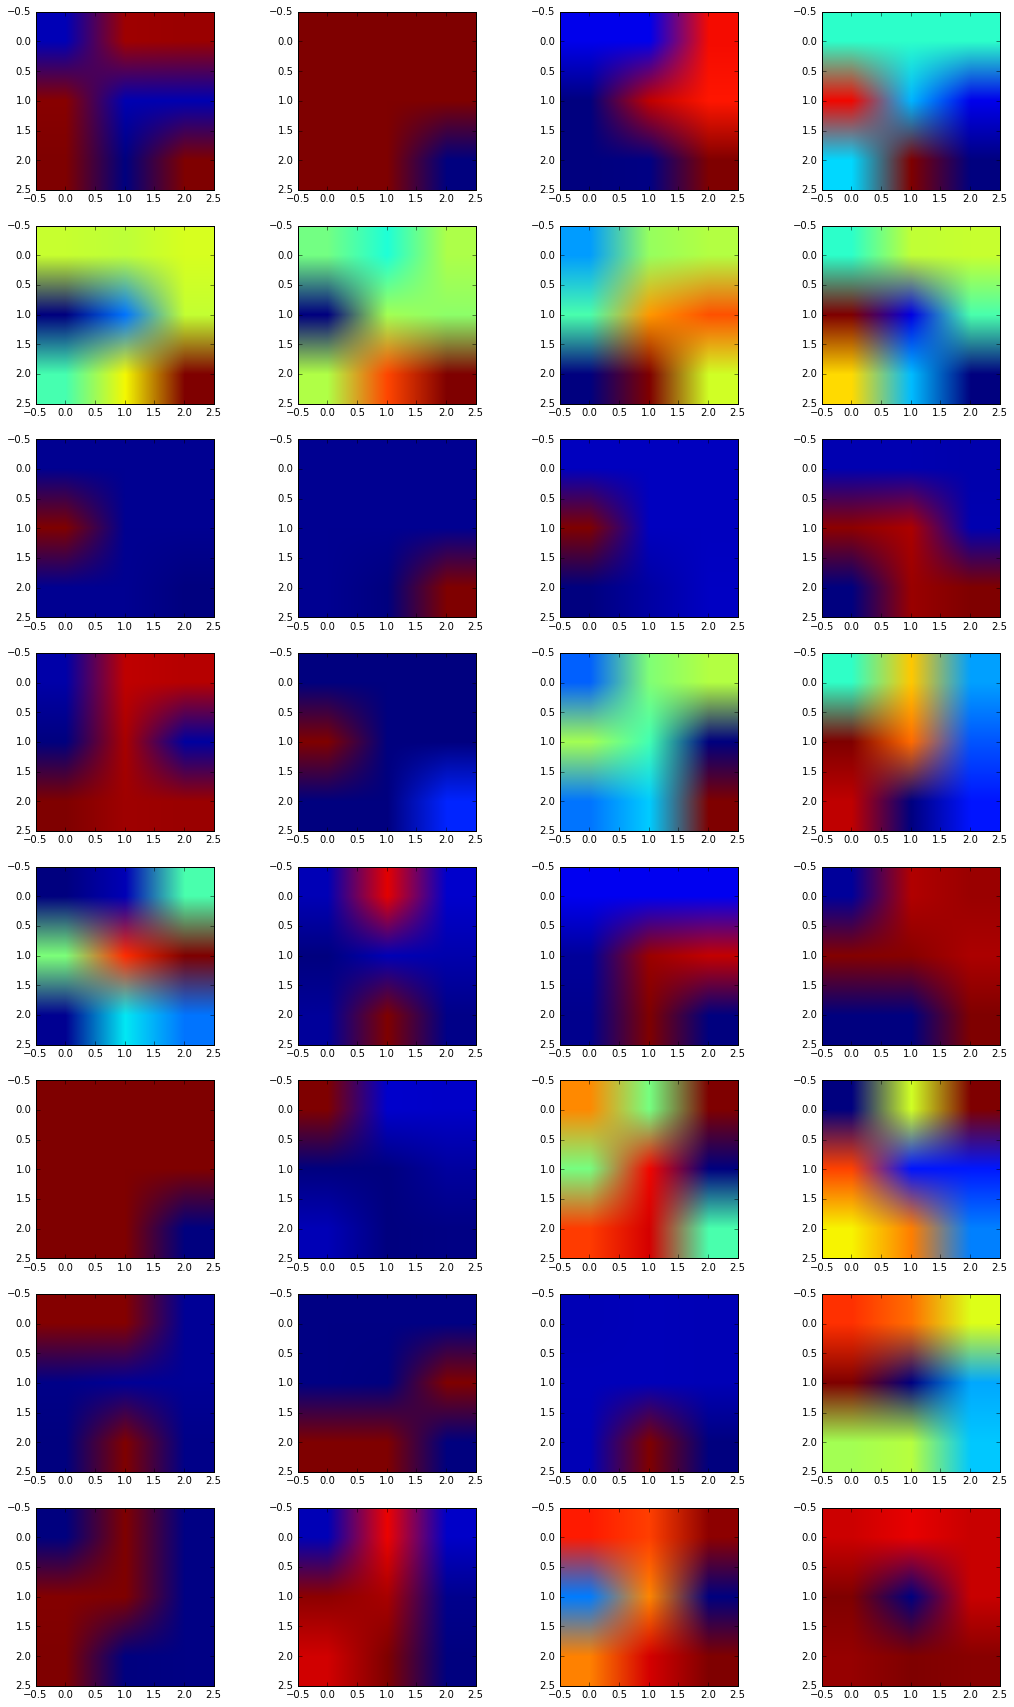

In [12]:
# look at first layer (of 32 layers) of the second x convolution
fig = plt.figure(figsize=(18, 30))
gs = plt.GridSpec(8, 4)
for i in range(0, 32):
    ax = plt.subplot(gs[i])
    ax.imshow(param_values[2][0][i], interpolation=None)
    
figname = 'second-x-conv-from-first-x-convfilt-weights.pdf'
plt.savefig(figname)

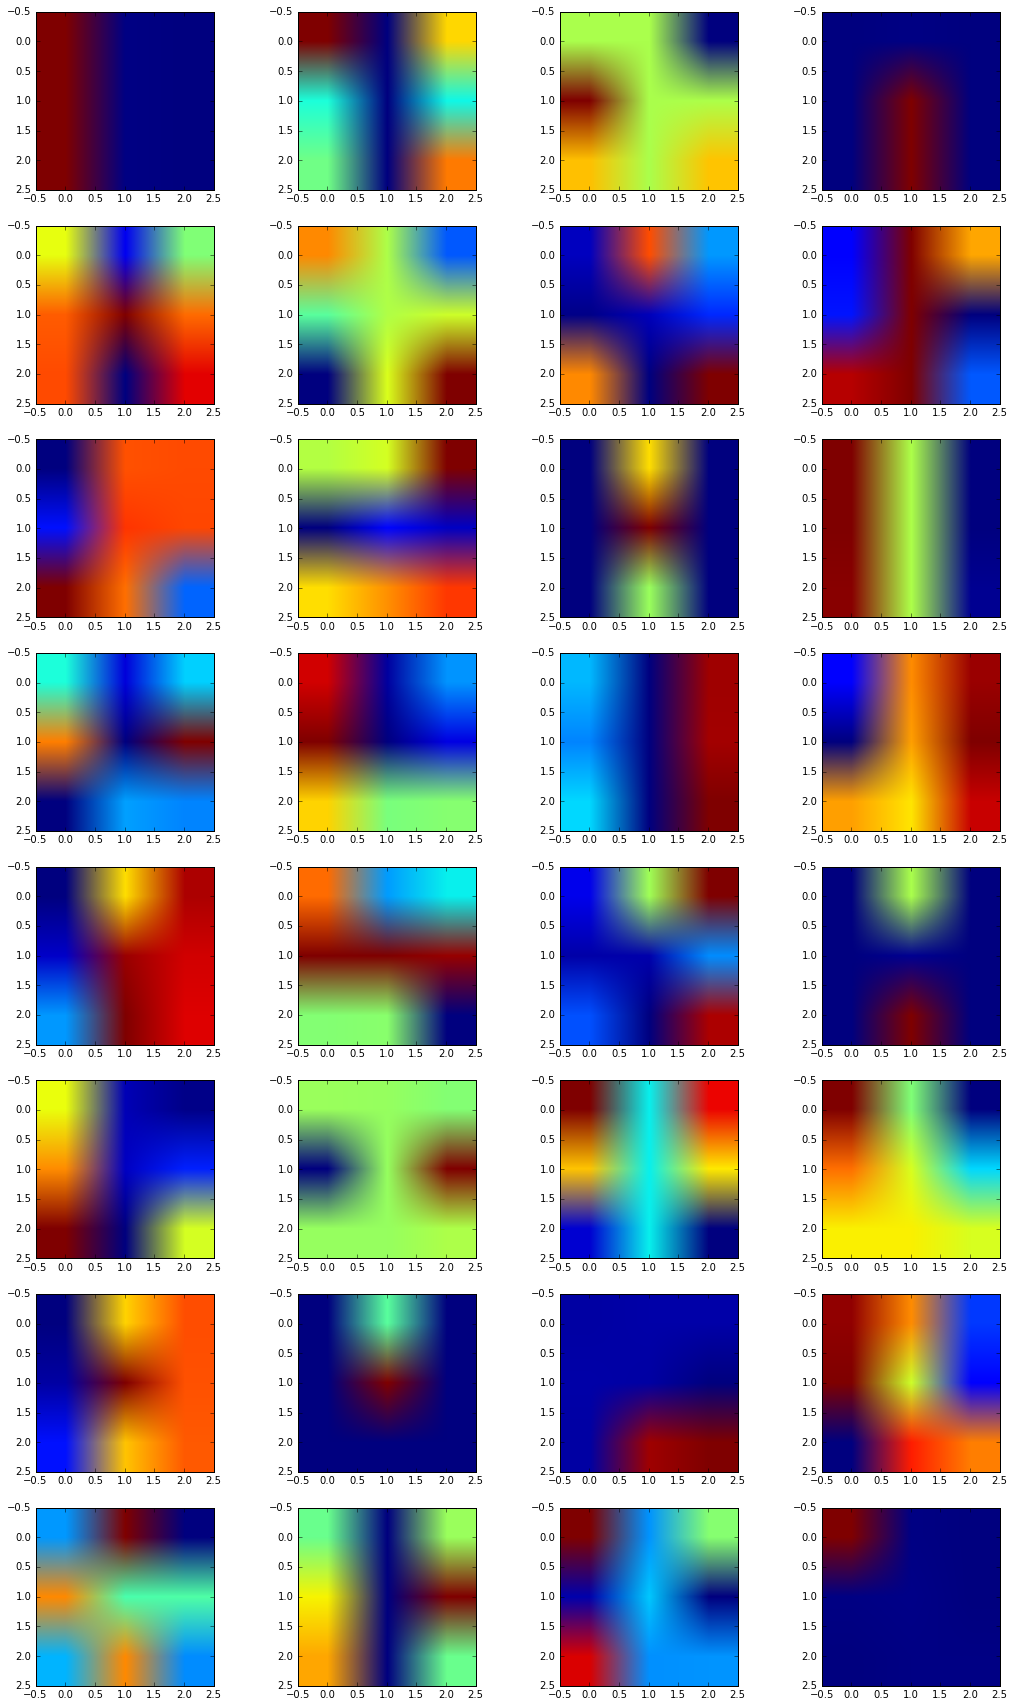

In [13]:
fig = plt.figure(figsize=(18, 30))
gs = plt.GridSpec(8, 4)
for i in range(0, 32):
    ax = plt.subplot(gs[i])
    ax.imshow(param_values[6][i][0])
    
figname = 'first-u-conv-weights.pdf'
plt.savefig(figname)

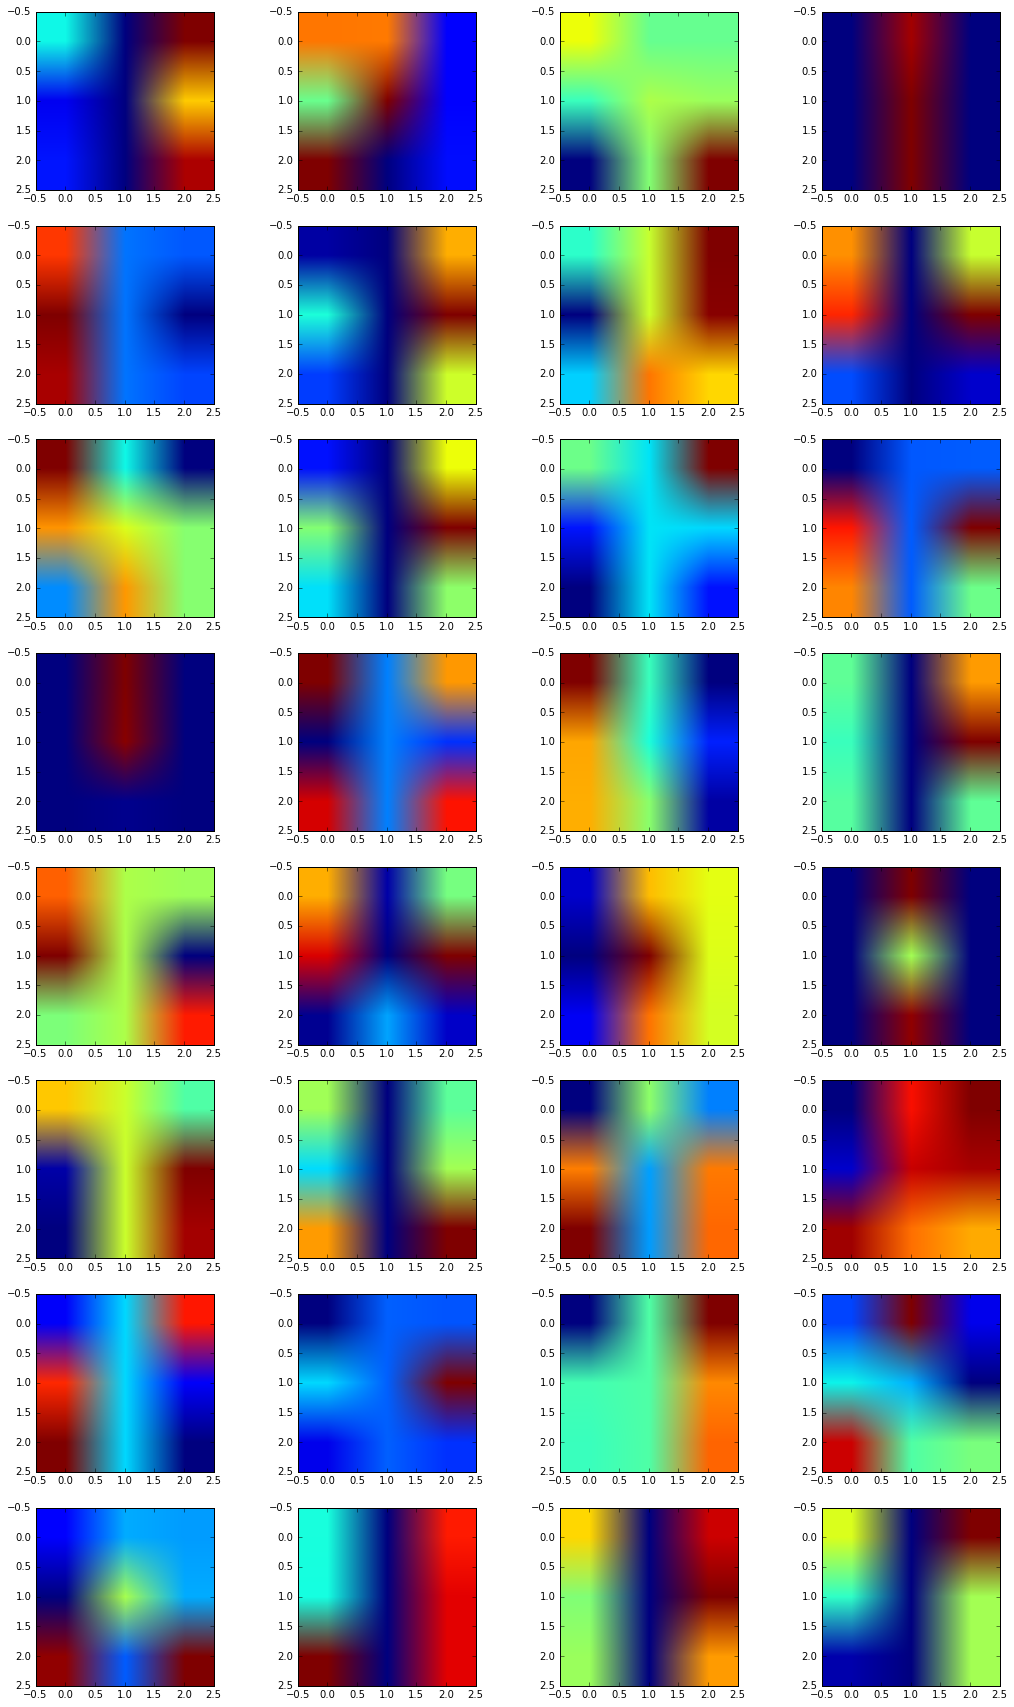

In [14]:
fig = plt.figure(figsize=(18, 30))
gs = plt.GridSpec(8, 4)
for i in range(0, 32):
    ax = plt.subplot(gs[i])
    ax.imshow(param_values[12][i][0])
    
figname = 'first-v-conv-weights.pdf'
plt.savefig(figname)

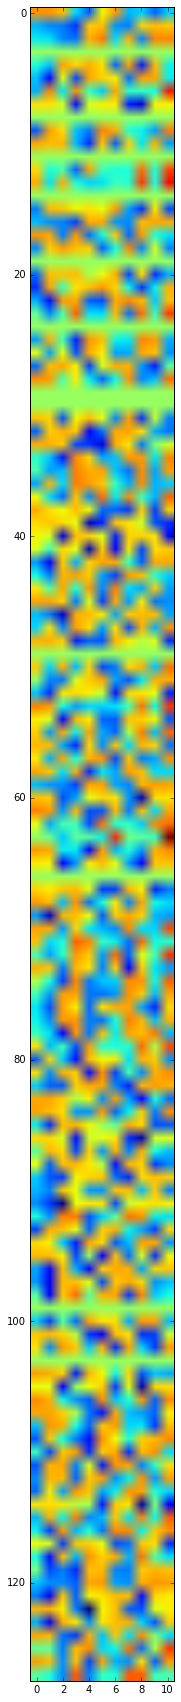

In [15]:
fig = plt.figure(figsize=(18, 30))
plt.imshow(param_values[20])

In [25]:
img_arr = np.load('actvis1457480019_1172000012016701.npy')

In [26]:
np.shape(img_arr)

(3, 1, 1, 32, 48, 48)

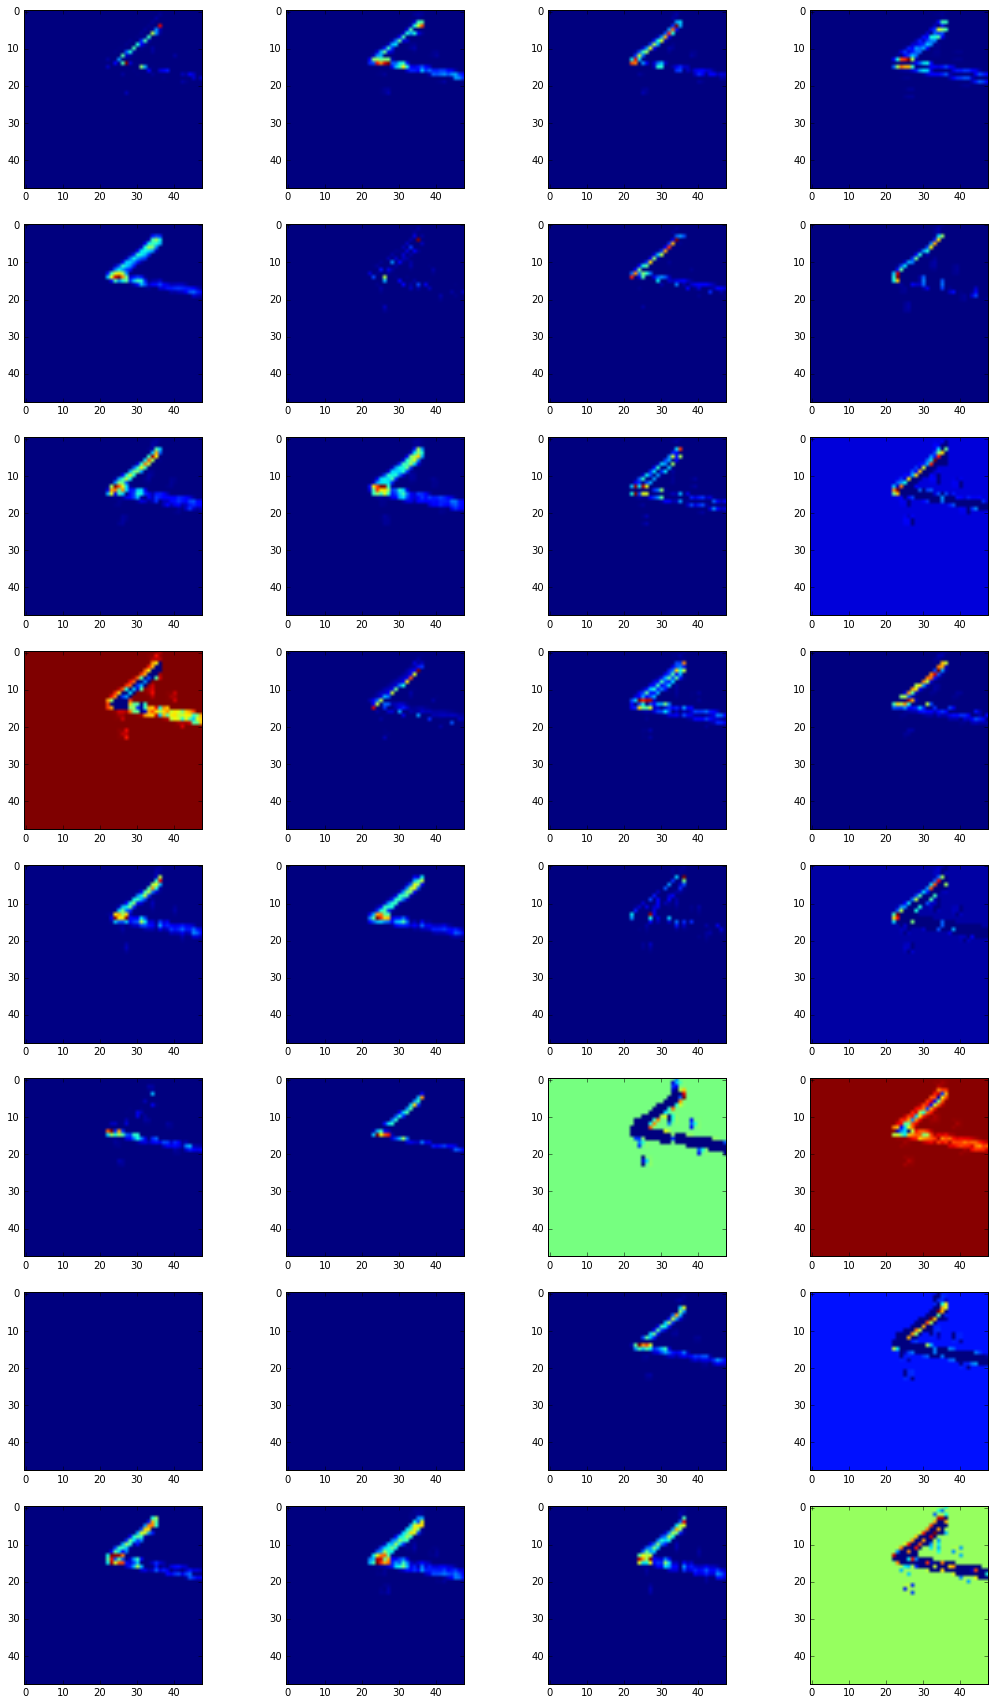

In [33]:
fig = plt.figure(figsize=(18, 30))
gs = plt.GridSpec(8, 4)
for i in range(0, 32):
    ax = plt.subplot(gs[i])
    ax.imshow(img_arr[0][0][0][i])
    
figname = 'activations-1172000012016701-x-first-convo.pdf'
plt.savefig(figname)